## Reading

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [350]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

## Categories

In [351]:
#save the id
train_ID = train["Id"]
test_ID  = test["Id"]
y = train.SalePrice

#drop ID
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

test[["LotFrontage", "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","GarageCars","BsmtHalfBath","GarageYrBlt"]] = test[["LotFrontage", "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","GarageCars","BsmtHalfBath","GarageYrBlt"]].apply(pd.to_numeric, errors="coerce")
train[["LotFrontage", "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","GarageCars","BsmtHalfBath","GarageYrBlt"]] = train[["LotFrontage", "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","GarageCars","BsmtHalfBath","GarageYrBlt"]].apply(pd.to_numeric, errors="coerce")

#group features for preprocessing purpose.
categorical_features = [feature for feature in train.columns if train[feature].dtype == "object"] 

nominal_features = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

ordinal_features = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']

numerical_features = [feature for feature in train.columns if feature not in categorical_features + ['SalePrice']]

discrete_numerical = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"] 

continuous_numerical = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                  'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                  'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                  'MiscVal','YrSold']

In [352]:
train[ordinal_features].info

<bound method DataFrame.info of      LotShape Utilities LandSlope ExterQual ExterCond BsmtQual BsmtCond  \
0         Reg    AllPub       Gtl        Gd        TA       Gd       TA   
1         Reg    AllPub       Gtl        TA        TA       Gd       TA   
2         IR1    AllPub       Gtl        Gd        TA       Gd       TA   
3         IR1    AllPub       Gtl        TA        TA       TA       Gd   
4         IR1    AllPub       Gtl        Gd        TA       Gd       TA   
...       ...       ...       ...       ...       ...      ...      ...   
1455      Reg    AllPub       Gtl        TA        TA       Gd       TA   
1456      Reg    AllPub       Gtl        TA        TA       Gd       TA   
1457      Reg    AllPub       Gtl        Ex        Gd       TA       Gd   
1458      Reg    AllPub       Gtl        TA        TA       TA       TA   
1459      Reg    AllPub       Gtl        Gd        TA       TA       TA   

     BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual F

## Visuals

### missing values

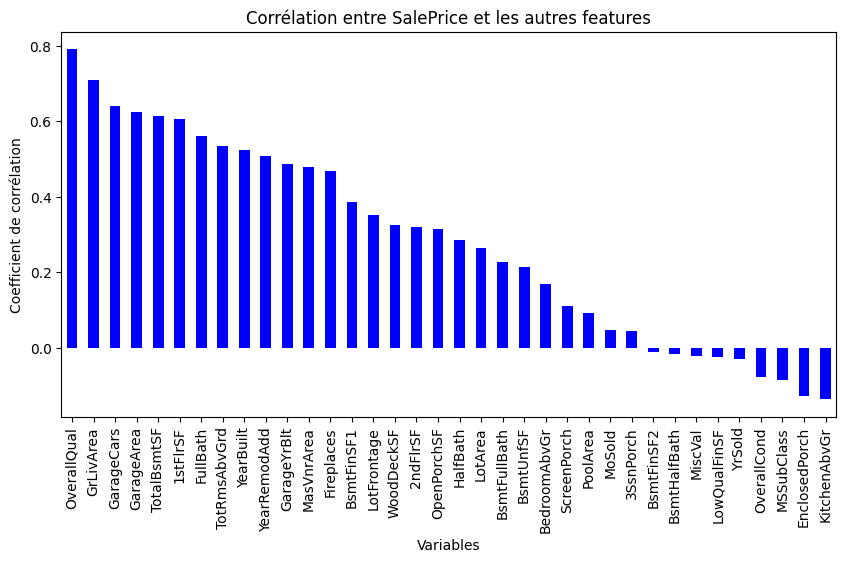

In [353]:
#train_numerical.corr()
train_numerical = train[[feature for feature in train.columns if feature not in categorical_features]]

corr = train_numerical.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
corr[1:].plot(kind='bar', color='b')  # Exclut SalePrice (qui a une corrélation de 1 avec lui-même)
plt.title("Corrélation entre SalePrice et les autres features")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Variables")
plt.show()

In [354]:
missing_values = train.isnull().sum()
missing_values_percent = (missing_values / len(train)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_values_percent})
missing_data = missing_data[missing_data["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)


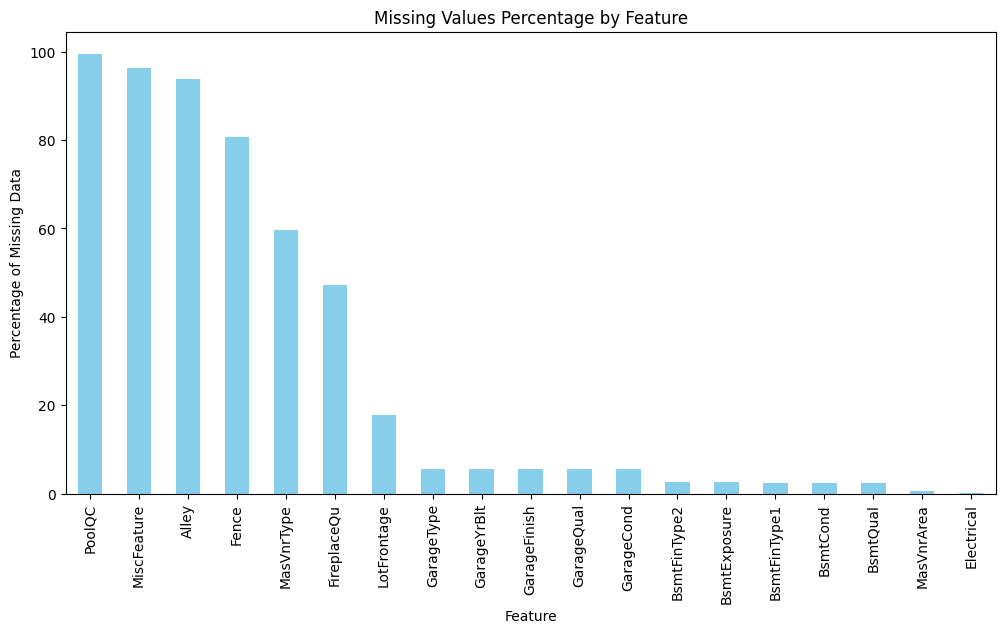

In [355]:
# Plotting missing values as a bar plot
plt.figure(figsize=(12, 6))
missing_data["Percentage"].plot(kind="bar", color='skyblue')
plt.title("Missing Values Percentage by Feature")
plt.xlabel("Feature")
plt.ylabel("Percentage of Missing Data")
plt.show()


In [356]:
# Count of missing values per feature
missing_values = train.isnull().sum()

# Create a DataFrame to show the number of missing values
missing_data = pd.DataFrame({"Missing Values": missing_values})
missing_data = missing_data[missing_data["Missing Values"] > 0].sort_values(by="Missing Values", ascending=False)

# Show the top features with the most missing value

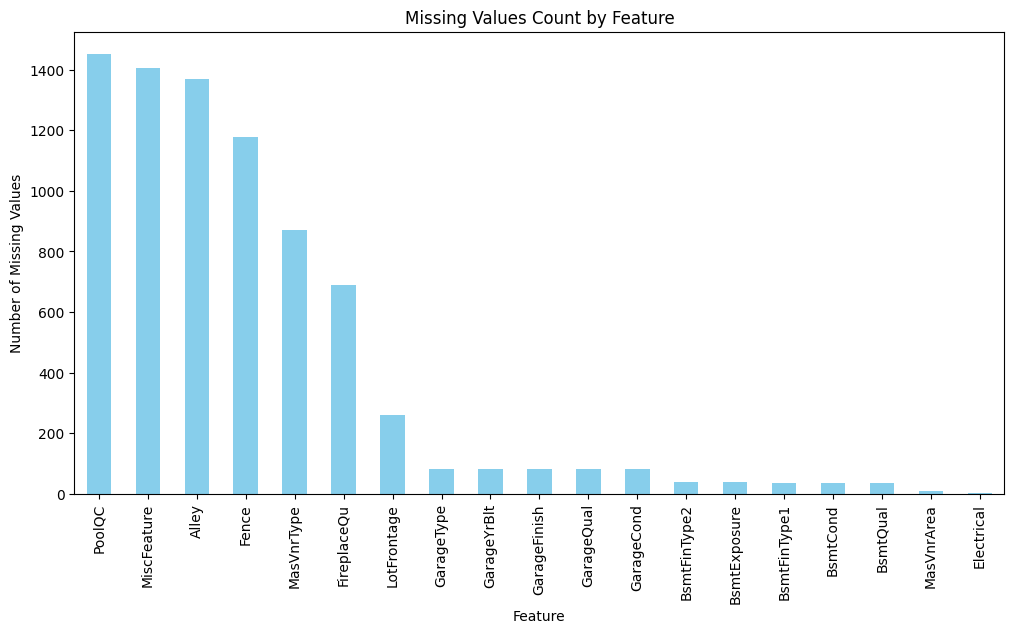

In [357]:
# Plotting missing values as a bar plot
plt.figure(figsize=(12, 6))
missing_data["Missing Values"].plot(kind="bar", color='skyblue')
plt.title("Missing Values Count by Feature")
plt.xlabel("Feature")
plt.ylabel("Number of Missing Values")
plt.show()


### other

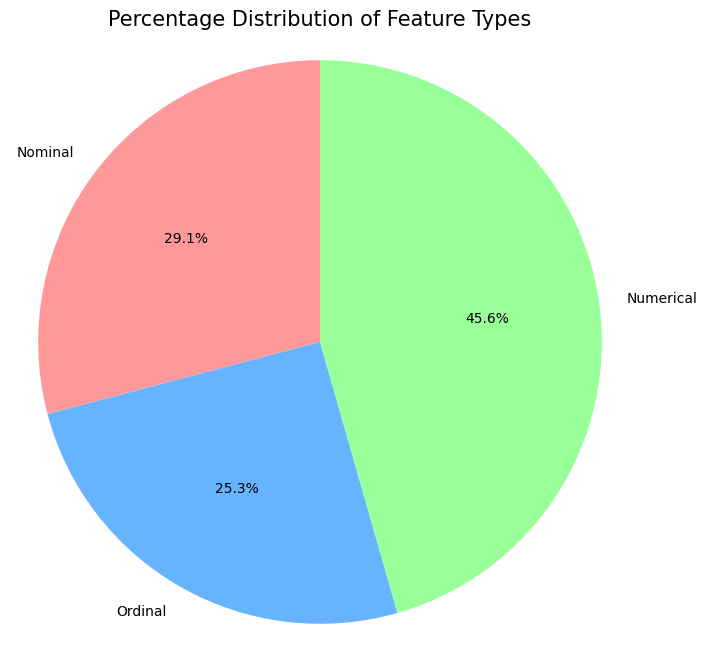

In [358]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the feature types
feature_types = ['Nominal', 'Ordinal', 'Numerical']

# Count the number of features in each category
feature_counts = [len(nominal_features), len(ordinal_features), len(numerical_features)]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(feature_counts, labels=feature_types, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF','#99FF99'])
plt.title('Percentage Distribution of Feature Types', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

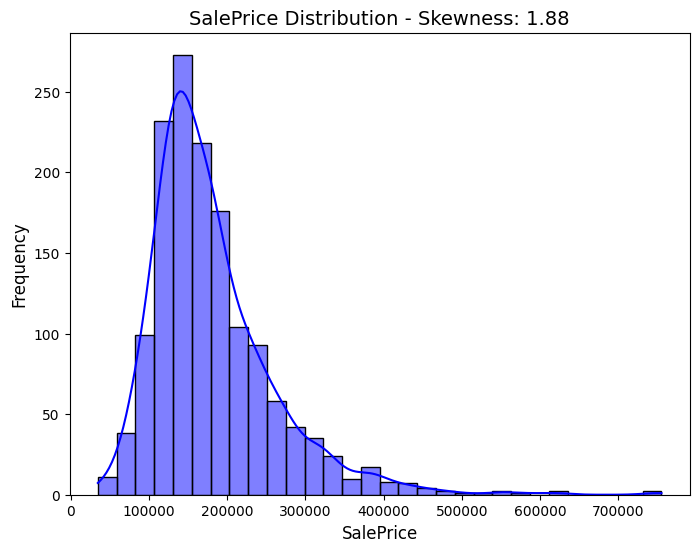

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Plotting SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue', bins=30)

# Calculate skewness
sale_price_skewness = skew(train['SalePrice'], nan_policy="omit")

# Add title with skewness value
plt.title(f'SalePrice Distribution - Skewness: {sale_price_skewness:.2f}', fontsize=14)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


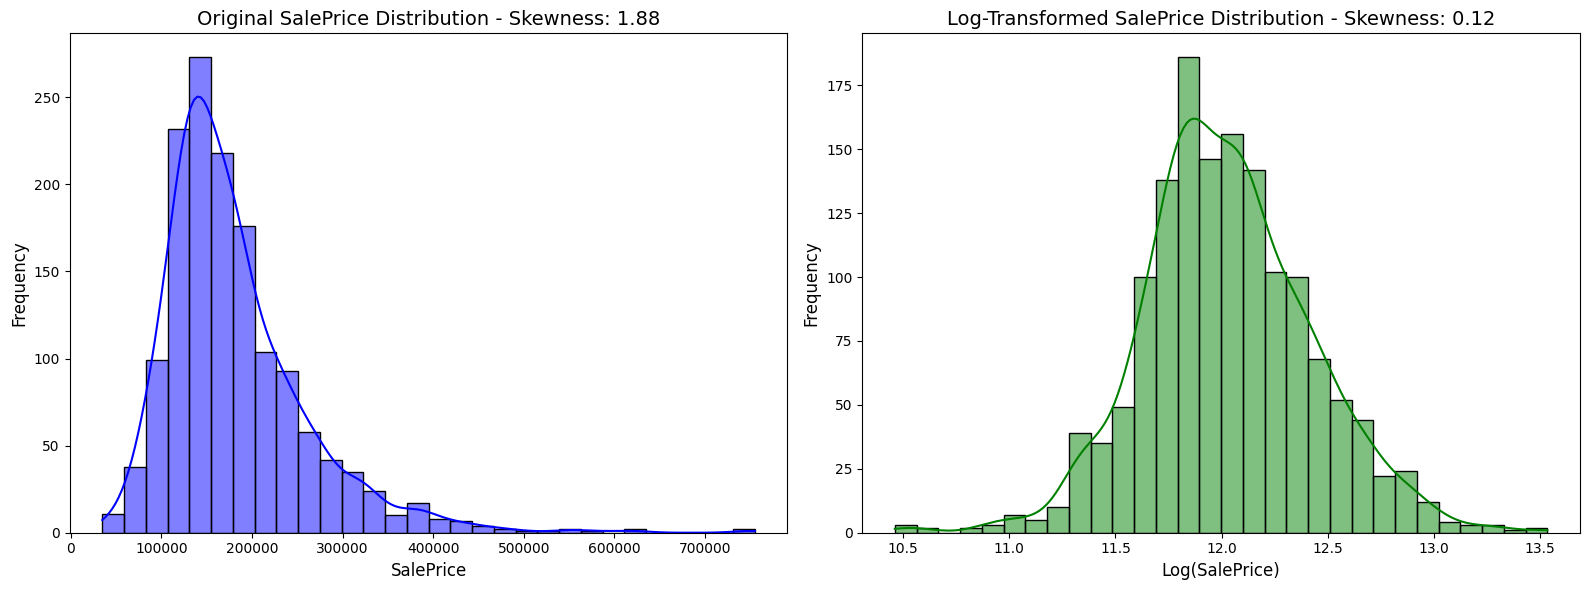

In [360]:
import numpy as np

# Apply log transformation to SalePrice
train['SalePrice_log'] = np.log(train['SalePrice'])

# Plotting original and log-transformed SalePrice
plt.figure(figsize=(16, 6))

# Original SalePrice Distribution
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True, color='blue', bins=30)
sale_price_skewness = skew(train['SalePrice'], nan_policy="omit")
plt.title(f'Original SalePrice Distribution - Skewness: {sale_price_skewness:.2f}', fontsize=14)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Log-transformed SalePrice Distribution
plt.subplot(1, 2, 2)
sns.histplot(train['SalePrice_log'], kde=True, color='green', bins=30)
log_sale_price_skewness = skew(train['SalePrice_log'], nan_policy="omit")
plt.title(f'Log-Transformed SalePrice Distribution - Skewness: {log_sale_price_skewness:.2f}', fontsize=14)
plt.xlabel('Log(SalePrice)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [361]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set up the subplot grid (1 row, 3 columns)
# plt.figure(figsize=(18, 6))

# # Plot Total_usable_area
# plt.subplot(1, 3, 1)
# sns.scatterplot(x=train['Total_usable_area'], y=train['SalePrice'])
# plt.title('Total Usable Area vs. SalePrice')

# # Plot Area_Quality_Indicator
# plt.subplot(1, 3, 2)
# sns.scatterplot(x=train['Area_Quality_Indicator'], y=train['SalePrice'])
# plt.title('Area Quality Indicator vs. SalePrice')

# # Plot Area_Qual_Cond_Indicator
# plt.subplot(1, 3, 3)
# sns.scatterplot(x=train['Area_Qual_Cond_Indicator'], y=train['SalePrice'])
# plt.title('Area Quality Condition Indicator vs. SalePrice')

# # Show the plot
# plt.tight_layout()
# plt.show()


## KNN Imputer

In [362]:
# from sklearn.impute import KNNImputer

# # Initialize KNN Imputer (default K=5)
# knn_imputer = KNNImputer(n_neighbors=5)

# # Apply to numerical features
# train[train_numerical] = knn_imputer.fit_transform(train[train_numerical])
# test[test_numerical] = knn_imputer.transform(test[test_numerical])

# print("✅ KNN Imputation applied successfully!")

## ML Imputer

In [363]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# iter_imputer = IterativeImputer(max_iter=10, random_state=42)  # Uses ML to predict missing values

# train[numerical_features] = iter_imputer.fit_transform(train[numerical_features])
# test[numerical_features] = iter_imputer.transform(test[numerical_features])

# print("✅ Iterative Imputation applied successfully!")


## Constant Value Imputation

In [364]:
# Fill Numerical Features with 0
train[numerical_features] = train[numerical_features].fillna(0)
test[numerical_features] = test[numerical_features].fillna(0)

# Fill Categorical Features with "Do_not_have_this_feature"
train[categorical_features] = train[categorical_features].fillna("NA")
test[categorical_features] = test[categorical_features].fillna("NA")

print("✅ Constant Value Imputation applied successfully!")


✅ Constant Value Imputation applied successfully!


## Feature Engineering

In [365]:
# Assuming you're working with the 'train' DataFrame
train["Lack_of_feature_index"] = train[["Street", "Alley", "MasVnrType", "GarageType", "MiscFeature", 'BsmtQual',
                                        'FireplaceQu', 'PoolQC', 'Fence']].isnull().sum(axis=1) + (train["MasVnrType"] == 'None') + (train["CentralAir"] == 'No')

train["MiscFeatureExtended"] = (train["PoolQC"].notnull() * 1 + train["MiscFeature"].notnull() * 1 + train["Fence"].notnull() * 1).astype('int64')

train["Has_Alley"] = train["Alley"].notnull().astype('int64')

train["Lot_occupation"] = train["GrLivArea"] / train["LotArea"]

train["Number_of_floors"] = (train["TotalBsmtSF"] != 0).astype('int64') + (train["1stFlrSF"] != 0).astype('int64') + (train["2ndFlrSF"] != 0).astype('int64')

train['Total_Close_Live_Area'] = train['GrLivArea'] + train['TotalBsmtSF']

train['Outside_live_area'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

train['Total_usable_area'] = train['Total_Close_Live_Area'] + train['Outside_live_area']

train['Area_Quality_Indicator'] = train['Total_usable_area'] * train['OverallQual']

train['Area_Qual_Cond_Indicator'] = train['Total_usable_area'] * train['OverallQual'] * train['OverallCond']

train['TotalBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train["Has_garage"] = train["GarageYrBlt"].notnull().astype('int64')

train['House_Age'] = train['YrSold'] - train['YearBuilt']

train["Is_Remodeled"] = (train["YearBuilt"] != train["YearRemodAdd"]).astype('int64')

train['HasBsmt'] = train['BsmtQual'].notnull().astype('int64')

train['Quality_conditition'] = train['OverallQual'] * train['OverallCond']

train['Quality_conditition_2'] = train['OverallQual'] + train['OverallCond']

train['House_Age2'] = train['YrSold'] - train['YearRemodAdd']

In [366]:
# Assuming you're working with the 'test' DataFrame
test["Lack_of_feature_index"] = test[["Street", "Alley", "MasVnrType", "GarageType", "MiscFeature", 'BsmtQual',
                                        'FireplaceQu', 'PoolQC', 'Fence']].isnull().sum(axis=1) + (test["MasVnrType"] == 'None') + (test["CentralAir"] == 'No')

test["MiscFeatureExtended"] = (test["PoolQC"].notnull() * 1 + test["MiscFeature"].notnull() * 1 + test["Fence"].notnull() * 1).astype('int64')

test["Has_Alley"] = test["Alley"].notnull().astype('int64')

test["Lot_occupation"] = test["GrLivArea"] / test["LotArea"]

test["Number_of_floors"] = (test["TotalBsmtSF"] != 0).astype('int64') + (test["1stFlrSF"] != 0).astype('int64') + (test["2ndFlrSF"] != 0).astype('int64')

test['Total_Close_Live_Area'] = test['GrLivArea'] + test['TotalBsmtSF']

test['Outside_live_area'] = test['WoodDeckSF'] + test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

test['Total_usable_area'] = test['Total_Close_Live_Area'] + test['Outside_live_area']

test['Area_Quality_Indicator'] = test['Total_usable_area'] * test['OverallQual']

test['Area_Qual_Cond_Indicator'] = test['Total_usable_area'] * test['OverallQual'] * test['OverallCond']

test['TotalBath'] = (test['FullBath'] + (0.5 * test['HalfBath']) + test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

test["Has_garage"] = test["GarageYrBlt"].notnull().astype('int64')

test['House_Age'] = test['YrSold'] - test['YearBuilt']

test["Is_Remodeled"] = (test["YearBuilt"] != test["YearRemodAdd"]).astype('int64')

test['HasBsmt'] = test['BsmtQual'].notnull().astype('int64')

test['Quality_conditition'] = test['OverallQual'] * test['OverallCond']

test['Quality_conditition_2'] = test['OverallQual'] + test['OverallCond']

test['House_Age2'] = test['YrSold'] - test['YearRemodAdd']

## Outliers

In [367]:
# Remove outliers based on observations on scatter plots against SalePrice:
train = train.drop(train['LotFrontage']
                                     [train['LotFrontage']>200].index)
train = train.drop(train['LotArea']
                                     [train['LotArea']>100000].index)
train = train.drop(train['BsmtFinSF1']
                                     [train['BsmtFinSF1']>4000].index)
train = train.drop(train['TotalBsmtSF']
                                     [train['TotalBsmtSF']>6000].index)
train = train.drop(train['1stFlrSF']
                                     [train['1stFlrSF']>4000].index)
train = train.drop(train.GrLivArea
                                     [(train['GrLivArea']>4000) & 
                                      (y<300000)].index)
train = train.drop(train.LowQualFinSF
                                     [train['LowQualFinSF']>550].index)

## Ordinal Encoding

In [368]:
# Vérification si la variable a des valeurs uniques ou constantes
if len(train['GarageQual'].unique()) == 1:
    print("")
else:
    print("")

# Affichage des pourcentages des différentes valeurs
pourcentages = train['GarageQual'].value_counts(normalize=True) * 100
print(pourcentages)


GarageQual
TA    89.807163
NA     5.578512
Fa     3.305785
Gd     0.964187
Po     0.206612
Ex     0.137741
Name: proportion, dtype: float64


In [369]:
# ✅ Define ordinal mapping correctly
ordinal_mapping = {
    "GarageQual" : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "Fence" : {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0},
    "GarageFinish" : {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    "KitchenQual": {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    "GarageCond" : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "HeatingQC" : {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    "ExterQual" : {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    "BsmtCond": {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "LandSlope": {'Gtl': 2, 'Mod': 1, 'Sev': 0},
    "ExterCond" : {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    "BsmtExposure" : {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    "PavedDrive":  {'Y': 2, 'P': 1, 'N': 0},
    "BsmtQual" : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "LotShape" : {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    "BsmtFinType2" : {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0},
    "BsmtFinType1" : {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0},
    "FireplaceQu" : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "Utilities" : {"AllPub":3, "NoSewr":2, "NoSeWa":1,  "ELO":0},
    "Functional" : {'Typ': 7,'Min1': 6,'Min2': 5,'Mod': 4,'Maj1': 3,'Maj2': 2, 'Sev': 1 , 'Sal': 0},
    "PoolQC" : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
}

# ✅ Extract the ordinal feature names
ordinal_cols = list(ordinal_mapping.keys())
train[ordinal_cols] = train[ordinal_cols].apply(lambda x: x.str.strip())

# ✅ Create an OrdinalEncoder with the correct category order
encoder = OrdinalEncoder(
    categories=[list(ordinal_mapping[col].keys()) for col in ordinal_cols],
    handle_unknown="use_encoded_value",  # Avoid errors for unseen categories
    unknown_value=-1  # Assign unknown categories as -1
)
train[ordinal_cols] = train[ordinal_cols].apply(lambda x: x.str.strip())

# ✅ Apply ordinal encoding to both datasets
train[ordinal_cols] = encoder.fit_transform(train[ordinal_cols])
test[ordinal_cols] = encoder.transform(test[ordinal_cols])

print("✅ Ordinal encoding applied successfully!")
train.replace(-1, 0, inplace=True)
test.replace(-1, 0, inplace=True)


✅ Ordinal encoding applied successfully!


In [370]:
# Vérification si la variable a des valeurs uniques ou constantes
if len(train['GarageQual'].unique()) == 1:
    print("La feature a la même valeur sur toutes les lignes")
else:
    print("La feature  contient des valeurs différentes")

# Affichage des pourcentages des différentes valeurs
pourcentages = train['GarageQual'].value_counts(normalize=True) * 100
print(pourcentages)

La feature  contient des valeurs différentes
GarageQual
2.0    89.807163
5.0     5.578512
3.0     3.305785
1.0     0.964187
4.0     0.206612
0.0     0.137741
Name: proportion, dtype: float64


## One Hot Encoding

In [371]:
# Vérification si la variable a des valeurs uniques ou constantes
if len(train['LotFrontage'].unique()) == 1:
    print("La feature a la même valeur sur toutes les lignes")
else:
    print("La feature  contient des valeurs différentes")

# Affichage des pourcentages des différentes valeurs
pourcentages = train['LotFrontage'].value_counts(normalize=True) * 100
print(pourcentages)

La feature  contient des valeurs différentes
LotFrontage
0.0      17.630854
60.0      9.848485
70.0      4.820937
80.0      4.752066
50.0      3.925620
           ...    
140.0     0.068871
112.0     0.068871
33.0      0.068871
141.0     0.068871
46.0      0.068871
Name: proportion, Length: 109, dtype: float64


In [372]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit on train data, then transform both train & test
train_encoded = encoder.fit_transform(train[nominal_features])
test_encoded = encoder.transform(test[nominal_features])

# Convert back to DataFrame
train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(nominal_features), index=train.index)
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(nominal_features), index=test.index)

# Drop original categorical features and replace with OHE
train = train.drop(columns=nominal_features).join(train_encoded)
test = test.drop(columns=nominal_features).join(test_encoded)

print("train & Test now have the same OHE features using `OneHotEncoder()`")
print("New shape of TEST dataset:", test.shape)
print("New shape of TRAIN dataset:", train.shape)

train & Test now have the same OHE features using `OneHotEncoder()`
New shape of TEST dataset: (1459, 243)
New shape of TRAIN dataset: (1452, 245)


In [ ]:
train['lot']

La feature  contient des valeurs différentes
LotFrontage
0.0      17.630854
60.0      9.848485
70.0      4.820937
80.0      4.752066
50.0      3.925620
           ...    
140.0     0.068871
112.0     0.068871
33.0      0.068871
141.0     0.068871
46.0      0.068871
Name: proportion, Length: 109, dtype: float64


In [374]:
extra_test_features = set(test.columns) - set(train.columns)
print("🛑 Features in test but NOT in train:", extra_test_features)

🛑 Features in test but NOT in train: set()


In [375]:
# Identify all numerical features after encoding
train_numerical = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude ordinal features (since they were manually mapped but remain categorical)
train_numerical = [col for col in train_numerical if col not in ordinal_mapping.keys()]
train_numerical = [col for col in train_numerical if "_" not in col]

print("✅ Updated numerical features:\n", train_numerical)


✅ Updated numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MiscFeatureExtended', 'TotalBath', 'HasBsmt']


In [376]:
# Identify all numerical features after encoding
test_numerical = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude ordinal features (since they were manually mapped but remain categorical)
test_numerical = [col for col in test_numerical if col not in ordinal_mapping.keys()]
test_numerical = [col for col in test_numerical if "_" not in col]

print("✅ Updated numerical features:\n", test_numerical)

✅ Updated numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MiscFeatureExtended', 'TotalBath', 'HasBsmt']


## Label Encoding

In [377]:
# from sklearn.preprocessing import LabelEncoder
# label_encoders = {}
# for col in nominal_features:
#     le = LabelEncoder()
#     train[col] = le.fit_transform(train[col].astype(str))
#     test[col] = le.fit_transform(test[col].astype(str))

#     label_encoders[col]= le

## Skewness

In [378]:
# # Compute skewness for each numerical feature
# skewness = train[train_numerical].apply(lambda x: x.skew()).sort_values(ascending=False)

# # Set threshold for skewness
# skew_threshold = 0.75

# # Get highly skewed features
# highly_skewed = skewness[(skewness > skew_threshold) & (skewness.index != "SalePrice")]
# print(f"🔍 Found {len(highly_skewed)} highly skewed features:\n", highly_skewed)

# # Apply Yeo-Johnson transformation
# pt = PowerTransformer(method="yeo-johnson")
# train[highly_skewed.index] = pt.fit_transform(train[highly_skewed.index])

# print("✅ Yeo-Johnson transformation applied successfully!")


In [379]:
# # Check skewness after transformation
# new_skewness = train[highly_skewed.index].apply(lambda x: x.skew())
# print("📉 Skewness after transformation:\n", new_skewness)


## Scaling

In [380]:
# scaler = StandardScaler()

# numerical_features = [col for col in train_numerical if col != "SalePrice"]

# train[numerical_features] = scaler.fit_transform(train[numerical_features])
# test[numerical_features] = scaler.fit_transform(test[numerical_features])

# print("standardization applied.")

In [381]:
train.shape

(1452, 245)

In [382]:
test.shape

(1459, 243)

## Dropping Corr and MI features

#### Features **Mutual Info**

In [383]:
# y = train.SalePrice
# train_numerical = train.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice", errors="ignore")
# mutual_df = train[train_numerical]
# mutual_info = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = mutual_df.columns

# #define threshold using
# # mi_threshold = 0.01  # Drop bottom 0.01 MI features

# mi_threshold = mutual_info.quantile(0.20)  # Drop bottom 0.01 MI features

# # identify low MI features
# low_mi_features = mutual_info[mutual_info < mi_threshold].index.tolist()

# # drop them from the dataset
# train.drop(columns=low_mi_features, inplace=True)
# test.drop(columns=low_mi_features, inplace=True)

# print(f"Dropped {len(low_mi_features)} numerical features with MI < {mi_threshold:.4f}")
# print(f"Remaining TRAIN features: {train.shape[1]}")
# print(f"Dropped {len(low_mi_features)} numerical features with MI < {mi_threshold:.4f}")
# print(f"Remaining TEST features: {test.shape[1]}")

#### Features Correlation

In [384]:
# import matplotlib.pyplot as plt

# train.columns = train.columns.str.strip()
# test.columns = test.columns.str.strip()

# # Compute the correlation matrix
# correlation_matrix = train.corr()

# # Set a threshold for high correlation
# correlation_threshold = 0.8  

# # Select upper triangle of correlation matrix (to avoid duplicate pairs)
# upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# # Find pairs of highly correlated features
# highly_correlated_pairs = []
# for col in upper_triangle.columns:
#     for row in upper_triangle.index:
#         if upper_triangle.loc[row, col] > correlation_threshold:
#             highly_correlated_pairs.append((row, col, upper_triangle.loc[row, col]))

# # Sort pairs by correlation value (descending order)
# highly_correlated_pairs = sorted(highly_correlated_pairs, key=lambda x: abs(x[2]), reverse=True)

# # Display the highly correlated feature pairs
# print(f"\n🔍 Found {len(highly_correlated_pairs)} highly correlated feature pairs (above {correlation_threshold} threshold):\n")
# for feature1, feature2, corr_value in highly_correlated_pairs:
#     # Compare their correlation with SalePrice
#     corr_feature1 = abs(correlation_matrix.loc[feature1, "SalePrice"])
#     corr_feature2 = abs(correlation_matrix.loc[feature2, "SalePrice"])
    
#     # Select the one with the highest correlation to SalePrice
#     feature_to_keep = feature1 if corr_feature1 >= corr_feature2 else feature2
#     feature_to_drop = feature2 if corr_feature1 >= corr_feature2 else feature1
    
#     print(f"🔹 {feature1} ↔ {feature2} | Correlation: {corr_value:.2f} | Keeping: {feature_to_keep}, Dropping: {feature_to_drop}")

# # Extract the unique highly correlated features
# correlated_features = list(set(sum([[f1, f2] for f1, f2, _ in highly_correlated_pairs], [])))

# # ✅ Drop highly correlated features from train & test datasets
# train.drop(columns=[feature_to_drop for _, feature_to_drop, _ in highly_correlated_pairs], inplace=True)
# test.drop(columns=[feature_to_drop for _, feature_to_drop, _ in highly_correlated_pairs], inplace=True)

# print(f"\n✅ Dropped {len(highly_correlated_pairs)} highly correlated features to reduce redundancy.")

## PCA 

In [385]:
# #extract target before applying PCA
# y_train = train["SalePrice"]  
# X_train = train.drop(columns=["SalePrice"])  
# X_test = test.copy()  

# #apply PCA (Retain 98% variance)
# pca = PCA(n_components=0.98)  
# X_train_pca = pca.fit_transform(X_train)  
# X_test_pca = pca.transform(X_test)  

# #convert PCA output back to DataFrame
# pca_columns = [f"PCA_{i+1}" for i in range(X_train_pca.shape[1])]
# X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index, columns=pca_columns)
# X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns=pca_columns)

# #reattach `SalePrice` to `train_pca`
# X_train_pca["SalePrice"] = y_train.values  

# # #save processed datasets
# # X_train_pca.to_csv("train_pca.csv", index=False)
# # X_test_pca.to_csv("test_pca.csv", index=False)
# train = X_train_pca
# test = X_test_pca
# print(f"✅ PCA completed! New train shape: {X_train_pca.shape}, test shape: {X_test_pca.shape}")

## Exporting 

In [386]:
train.insert(0, "Id", train_ID)
test.insert(0, "Id", test_ID)
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()
# # # save processed datasets
# train.to_csv("train_simp_fixedOrdinal_FE.csv", index=False)
# test.to_csv("test_simp_fixedOrdinal_FE.csv", index=False)

In [387]:
print(f"New train shape: {train.shape}, test shape: {test.shape}")

New train shape: (1452, 246), test shape: (1459, 244)
